<a href="https://colab.research.google.com/github/rubyvanrooyen/observation_planning/blob/main/callisto/Jupiter_Callisto_closest_orbit_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ephem
import numpy as np
from pprint import pprint
from datetime import datetime

In [2]:
# print known planets and planet moons in ephem
pprint(ephem._libastro.builtin_planets())

[(0, 'Planet', 'Mercury'),
 (1, 'Planet', 'Venus'),
 (2, 'Planet', 'Mars'),
 (3, 'Planet', 'Jupiter'),
 (4, 'Planet', 'Saturn'),
 (5, 'Planet', 'Uranus'),
 (6, 'Planet', 'Neptune'),
 (7, 'Planet', 'Pluto'),
 (8, 'Planet', 'Sun'),
 (9, 'Planet', 'Moon'),
 (10, 'PlanetMoon', 'Phobos'),
 (11, 'PlanetMoon', 'Deimos'),
 (12, 'PlanetMoon', 'Io'),
 (13, 'PlanetMoon', 'Europa'),
 (14, 'PlanetMoon', 'Ganymede'),
 (15, 'PlanetMoon', 'Callisto'),
 (16, 'PlanetMoon', 'Mimas'),
 (17, 'PlanetMoon', 'Enceladus'),
 (18, 'PlanetMoon', 'Tethys'),
 (19, 'PlanetMoon', 'Dione'),
 (20, 'PlanetMoon', 'Rhea'),
 (21, 'PlanetMoon', 'Titan'),
 (22, 'PlanetMoon', 'Hyperion'),
 (23, 'PlanetMoon', 'Iapetus'),
 (24, 'PlanetMoon', 'Ariel'),
 (25, 'PlanetMoon', 'Umbriel'),
 (26, 'PlanetMoon', 'Titania'),
 (27, 'PlanetMoon', 'Oberon'),
 (28, 'PlanetMoon', 'Miranda')]


ASCII art for simple display of Jovian moon orbital distance from Jupiter

In [3]:
import ephem

moons = ((ephem.Io(), 'i'),
         (ephem.Europa(), 'e'),
         (ephem.Ganymede(), 'g'),
         (ephem.Callisto(), 'c'))

# How to place discrete characters on a line that actually represents
# the real numbers -maxradii to +maxradii.

linelen = 65
maxradii = 30.

def put(line, character, radii):
    if abs(radii) > maxradii:
        return
    offset = radii / maxradii * (linelen - 1) / 2
    i = int(linelen / 2 + offset)
    line[i] = character

interval = ephem.hour * 3

now = ephem.now()
# or set a date
# date_str = '{}/{:02d}/{:02d}'.format(2021, 9, 3)
# date_str = '{}/{:02d}/{:02d}'.format(2021, 9, 21)
# date_str = '{}/{:02d}/{:02d}'.format(2021, 10, 7)
# date_str = '{}/{:02d}/{:02d}'.format(2021, 10, 16)
# date_str = '{}/{:02d}/{:02d}'.format(2021, 11, 1)
# date_str = '{}/{:02d}/{:02d}'.format(2021, 11, 18)
date_str = '{}/{:02d}/{:02d}'.format(2021, 12, 5)
today = datetime.strptime(date_str, '%Y/%m/%d')
now = ephem.Date(today)

now -= now % interval

t = now
#while t < now + 2:
while t < now + 17:
    line = [' '] * linelen
    put(line, 'J', 0)
    for moon, character in moons:
        moon.compute(t)
        put(line, character, moon.x)
    print(str(ephem.date(t))[5:], ''.join(line).rstrip())
    t += interval

print('East is to the right;')
print(', '.join([ '%s = %s' % (c, m.name) for m, c in moons ]))

12/5 00:00:00                         e    i  J    g                  c
12/5 03:00:00                          e     iJ      g                c
12/5 06:00:00                            e    J i     g                c
12/5 09:00:00                              e  J   i     g              c
12/5 12:00:00                                eJ     i    g             c
12/5 15:00:00                                 Je    i     g             c
12/5 18:00:00                                 J  e i       g            c
12/5 21:00:00                                 J  i e        g           c
12/6 00:00:00                                 Ji    e       g           c
12/6 03:00:00                               i J       e      g          c
12/6 06:00:00                             i   J        e     g          c
12/6 09:00:00                            i    J        e     g          c
12/6 12:00:00                           i     J        e     g          c
12/6 15:00:00                            i   

In [ ]:
interval = ephem.hour * 1.5
#date_str = '{}/{:02d}/{:02d}'.format(2021, 8, 27)
#date_str = '{}/{:02d}/{:02d}'.format(2021, 8, 25)
#date_str = '{}/{:02d}/{:02d}'.format(2021, 9, 13)
#date_str = '{}/{:02d}/{:02d}'.format(2021, 9, 29)
#date_str = '{}/{:02d}/{:02d}'.format(2021, 10, 16)
date_str = '{}/{:02d}/{:02d}'.format(2021, 10,31)
today = datetime.strptime(date_str, '%Y/%m/%d')
now = ephem.Date(today)
now -= now % interval

t = now
#while t < now + 2:i
while t < now + 5:
    line = [' '] * linelen
    put(line, 'J', 0)
    for moon, character in moons:
        moon.compute(t)
        put(line, character, moon.x)
    print(str(ephem.date(t))[5:], ''.join(line).rstrip())
    t += interval

print('East is to the right;')
print(', '.join([ '%s = %s' % (c, m.name) for m, c in moons ]))

In [5]:
# set MeerKAT as observer
# Observer
MKT = ephem.Observer()
MKT.lat = '-30:42:39.8'
MKT.lon = '21:26:38.0'
MKT.elevation = 1086.6
MKT.horizon= '15'
#MKT.horizon = ephem.degrees(15.0)
MKT.epoch = ephem.J2000

In [6]:
print(MKT)

<ephem.Observer date='2021/10/5 10:29:38' epoch='2000/1/1 12:00:00' lon='21:26:38.0' lat='-30:42:39.8' elevation=1086.6m horizon=15:00:00.0 temp=15.0C pressure=1010.0mBar>


In [7]:
def rise_set_time(date_str):
    obs_date = datetime.strptime(date_str, '%Y/%m/%d %H:%M')
    MKT.date = ephem.Date(obs_date)
 
    jupiter = ephem.Jupiter(MKT)
    callisto = ephem.Callisto(MKT)

    jupiter.compute(MKT)
    callisto.compute(MKT)
    phi = np.array(jupiter.radius)  # radius as an angle [rad]
    D = np.array(jupiter.earth_distance)  # ristance to Earth [AU]
    R = D*np.tan(phi)  # Jupiter radius [AU]

    risetime = MKT.next_rising(jupiter)
    settime = MKT.next_setting(jupiter, risetime)
    transittime = MKT.next_transit(jupiter, risetime)

#     MKT.date = risetime
#     jupiter.compute(MKT)
#     print(MKT.date, np.degrees(jupiter.alt), jupiter.ra, jupiter.dec)
#     MKT.date = settime
#     jupiter.compute(MKT)
#     print(MKT.date, np.degrees(jupiter.alt), jupiter.ra, jupiter.dec)
 
    print(f"Jupiter rises at {risetime} and sets at {settime}")
    print(f"Transit at {jupiter.transit_time}, {np.degrees(jupiter.transit_alt):.2f} [deg] elevation")

    MKT.date = risetime
    callisto.compute(MKT)
    r = callisto.x * R  # frac of radius, separation distance [AU]
    phi = np.degrees(np.arctan(r/D))  # deg
    print(f"  Callisto separation at {MKT.date} = {phi*60.:.2f} [arcmin]")
    MKT.date = transittime
    callisto.compute(MKT)
    r = callisto.x * R  # frac of radius, separation distance [AU]
    phi = np.degrees(np.arctan(r/D))  # deg
    print(f"  Callisto separation at {MKT.date} = {phi*60.:.2f} [arcmin]")
    MKT.date = settime
    callisto.compute(MKT)
    r = callisto.x * R  # frac of radius, separation distance [AU]
    phi = np.degrees(np.arctan(r/D))  # deg
    print(f"  Callisto separation at {MKT.date} = {phi*60.:.2f} [arcmin]")


# set observation date/time
def showtimes(elong_year, elong_month, elong_day):
    for day_ in range(elong_day-3, elong_day+4):
        if day_ > 30:
            day_ = day_ - 30
            month_ = elong_month + 1
            date_str = '{}/{:02d}/{:02d} {}:{}'.format(elong_year, month_, day_, 0, 0)
        elif day_ < 1:
            day_ = day_ + 31
            month_ = elong_month - 1
            date_str = '{}/{:02d}/{:02d} {}:{}'.format(elong_year, month_, day_, 0, 0)
        else:
            date_str = '{}/{:02d}/{:02d} {}:{}'.format(elong_year, elong_month, day_, 0, 0)
        rise_set_time(date_str)
        print()

# showtimes(2021, 8, 27)
# showtimes(2021, 9, 13)
# showtimes(2021, 9, 30)
# showtimes(2021, 11, 2)
# showtimes(2021, 11, 18)
showtimes(2021, 12, 5)

# once decided create datestring for calculation
date_str = '{}/{:02d}/{:02d} {}:{}'.format(2021, 11, 2, 0, 0)

Jupiter rises at 2021/12/2 10:18:11 and sets at 2021/12/2 21:02:27
Transit at 2021/12/2 15:40:21, 73.26 [deg] elevation
  Callisto separation at 2021/12/2 10:18:11 = 1.23 [arcmin]
  Callisto separation at 2021/12/2 15:40:21 = 1.87 [arcmin]
  Callisto separation at 2021/12/2 21:02:27 = 2.50 [arcmin]

Jupiter rises at 2021/12/3 10:14:54 and sets at 2021/12/3 20:58:57
Transit at 2021/12/3 15:36:57, 73.21 [deg] elevation
  Callisto separation at 2021/12/3 10:14:54 = 3.96 [arcmin]
  Callisto separation at 2021/12/3 15:36:57 = 4.51 [arcmin]
  Callisto separation at 2021/12/3 20:58:57 = 5.02 [arcmin]

Jupiter rises at 2021/12/4 10:11:37 and sets at 2021/12/4 20:55:27
Transit at 2021/12/4 15:33:33, 73.16 [deg] elevation
  Callisto separation at 2021/12/4 10:11:37 = 6.11 [arcmin]
  Callisto separation at 2021/12/4 15:33:33 = 6.49 [arcmin]
  Callisto separation at 2021/12/4 20:55:27 = 6.82 [arcmin]

Jupiter rises at 2021/12/5 10:08:20 and sets at 2021/12/5 20:51:57
Transit at 2021/12/5 15:30:10,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: the ephem.Body attributes 'rise_time', 'rise_az', 'transit_time', 'transit_alt', 'set_time', 'set_az', 'circumpolar', and 'never_up' are deprecated; please convert your program to use the ephem.Observer functions next_rising(), previous_rising(), next_transit(), and so forth



In [8]:
jupiter = ephem.Jupiter(MKT)
obs_date = datetime.strptime(date_str, '%Y/%m/%d %H:%M')
MKT.date = ephem.Date(obs_date)
jupiter.compute(MKT)

risetime = MKT.next_rising(jupiter)
settime = MKT.next_setting(jupiter, risetime)

print(f"Jupiter rises at {risetime} and sets at {settime}")
print(f"Transet at {jupiter.transit_time}, {np.degrees(jupiter.transit_alt):.2f} [deg] elevation")

Jupiter rises at 2021/11/2 12:02:52 and sets at 2021/11/2 22:51:33
Transet at 2021/11/2 17:27:13, 74.28 [deg] elevation


In [9]:
# apparent Earth distance calculations
def orbit(observer,  # ephem.Observer()
          solarbody,  # ephem.Body()
          obs_date=None,  # string CCYY-mm-dd HH:MM
          obs_period=1,  # period to calculate orbit over
          days=False,  # increment in days
          hours=False,  # increment in hours
          minutes=False,  # increment in minutes
          ):
    
    if obs_date is None:
        obs_date = datetime.now().replace(second=0, microsecond=0)
    # initiate observer date
    observer.date = ephem.Date(obs_date)

    # range increments
    if days:
        dt = 1
    elif hours:
        dt = ephem.hour
    else:  # default assumes hours
        dt = ephem.minute

    date_range = []
    solarbody_altitude = []  # altitude above the horizon
    solarbody_earth_distance = []  # Earth distance is in AU

    for inc_ in range(obs_period):
        date_range.append(ephem.Date(observer.date).datetime())
        solarbody.compute(observer)
        solarbody_altitude.append(np.degrees(solarbody.alt))
        solarbody_earth_distance.append(solarbody.earth_distance)
        # update observer date
        observer.date += dt

    return date_range, solarbody_altitude, solarbody_earth_distance

# Jupiter perigee
MKT.date = ephem.Date(obs_date)
jupiter = ephem.Jupiter(MKT)
[date_range,
 solarbody_altitude,
 solarbody_earth_distance] = orbit(MKT,
                                   jupiter,
                                   obs_date=obs_date,
                                   obs_period=1800,
                                   minutes=True)
print(date_range[0], date_range[-1])
print(solarbody_altitude)


2021-11-02 00:00:00 2021-11-03 05:59:00.000351
[1.675712421111993, 1.486978499532085, 1.2998680285405244, 1.1145234816145295, 0.931097364071662, 0.7497515727395921, 0.5706552081611309, 0.3939824935209663, 0.21990897268489568, 0.04860665102715898, -0.11976231115536219, -0.28505338265756003, -0.44714881942247775, -0.6059677664177728, -0.7614505128490604, -0.9136570096345633, -1.0626743416861992, -1.208691406423201, -1.3520133212023984, -1.4930333555095956, -1.6323489374537572, -1.770764001644535, -1.909290803461266, -2.0493720069227037, -2.19302838752782, -2.3432980987968013, -2.5050256658418903, -2.6869639760844586, -2.907605339815493, -3.2166906096656103, -3.7419494457559277, -4.295411200146285, -4.691455877188067, -5.0126207634721744, -5.295904993732569, -5.556842979462798, -5.803193388673171, -6.039425299514994, -6.268283167374142, -6.491578273041138, -6.71056139490774, -6.926149058983198, -7.138944883235416, -7.349482476193296, -7.558137925148016, -7.765205355120708, -7.970917846316

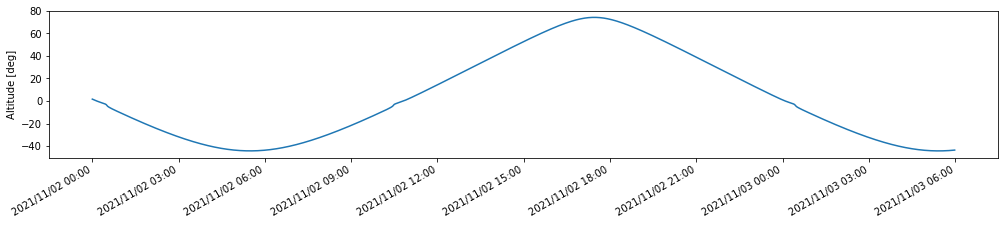

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(nrows=1, ncols=1,
                       figsize=(17, 3),
                       facecolor='white')
ax.plot(date_range, solarbody_altitude)
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%Y/%m/%d %H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_ylabel('Altitude [deg]', fontsize=10)
plt.show()

In [11]:
print(np.degrees(MKT.horizon))
print(MKT)

14.999999999999998
<ephem.Observer date='2021/11/3 06:00:00' epoch='2000/1/1 12:00:00' lon='21:26:38.0' lat='-30:42:39.8' elevation=1086.6m horizon=15:00:00.0 temp=15.0C pressure=1010.0mBar>
